<a href="https://colab.research.google.com/github/zuzanadostalova/Brain-Tumor-Detector/blob/main/ZD_final_ADZ_Group_challenge_Brain_Tumor_Detector_Helper.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Brain Tumor Detector

## Get and Load Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!gdown --id 11Xg7m7I2TbTEOXwRiU8ByZS9q63Mb2PP
#link didn't work

Access denied with the following error:

 	Cannot retrieve the public link of the file. You may need to change
	the permission to 'Anyone with the link', or have had many accesses. 

You may still be able to access the file from the browser:

	 https://drive.google.com/uc?id=11Xg7m7I2TbTEOXwRiU8ByZS9q63Mb2PP 



In [ ]:
!wget -c 'https://docs.google.com/uc?export=download&id=13ApP1oYLi6AsJ6sBctvC1tkmBG9MAmbz&confirm=t' -O brain_tumor.zip

--2022-03-25 12:37:43--  https://docs.google.com/uc?export=download&id=13ApP1oYLi6AsJ6sBctvC1tkmBG9MAmbz&confirm=t
Resolving docs.google.com (docs.google.com)... 209.85.145.139, 209.85.145.113, 209.85.145.102, ...
Connecting to docs.google.com (docs.google.com)|209.85.145.139|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0g-24-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/ebl2ogc1g6tdkjm0ve7hhuhfj06naip8/1648211850000/13526963153831051460/*/13ApP1oYLi6AsJ6sBctvC1tkmBG9MAmbz?e=download [following]
--2022-03-25 12:37:43--  https://doc-0g-24-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/ebl2ogc1g6tdkjm0ve7hhuhfj06naip8/1648211850000/13526963153831051460/*/13ApP1oYLi6AsJ6sBctvC1tkmBG9MAmbz?e=download
Resolving doc-0g-24-docs.googleusercontent.com (doc-0g-24-docs.googleusercontent.com)... 173.194.192.132, 2607:f8b0:4001:c0e::84
Connecting to doc-0g-24-docs.googleusercontent.com (doc-0g-2

In [ ]:
! cp /content/drive/MyDrive/SIT_ML/brain_tumor.zip ./brain_tumor.test.zip

In [ ]:
! unzip /content/drive/MyDrive/SIT_ML/brain_tumor_folder/brain_tumor.test.zip

Streaming output truncated to the last 5000 lines.
  inflating: Training/glioma/Tr-gl_0712.jpg  
  inflating: Training/glioma/Tr-gl_0713.jpg  
  inflating: Training/glioma/Tr-gl_0714.jpg  
  inflating: Training/glioma/Tr-gl_0715.jpg  
  inflating: Training/glioma/Tr-gl_0716.jpg  
  inflating: Training/glioma/Tr-gl_0717.jpg  
  inflating: Training/glioma/Tr-gl_0718.jpg  
  inflating: Training/glioma/Tr-gl_0719.jpg  
  inflating: Training/glioma/Tr-gl_0720.jpg  
  inflating: Training/glioma/Tr-gl_0721.jpg  
  inflating: Training/glioma/Tr-gl_0722.jpg  
  inflating: Training/glioma/Tr-gl_0723.jpg  
  inflating: Training/glioma/Tr-gl_0724.jpg  
  inflating: Training/glioma/Tr-gl_0725.jpg  
  inflating: Training/glioma/Tr-gl_0726.jpg  
  inflating: Training/glioma/Tr-gl_0727.jpg  
  inflating: Training/glioma/Tr-gl_0728.jpg  
  inflating: Training/glioma/Tr-gl_0729.jpg  
  inflating: Training/glioma/Tr-gl_0730.jpg  
  inflating: Training/glioma/Tr-gl_0731.jpg  
  inflating: Training/glioma/

In [ ]:
ls -l

total 671200
-rw------- 1 root root 155791278 Mar 25 12:37 brain_tumor.test.zip
-rw-r--r-- 1 root root 531496016 Mar 25 12:37 brain_tumor.zip
drwx------ 5 root root      4096 Mar 25 09:17 drive/
drwxr-xr-x 1 root root      4096 Mar 23 14:22 sample_data/
drwxr-xr-x 6 root root      4096 Mar 25 09:20 Testing/
drwxr-xr-x 6 root root      4096 Mar 25 09:20 Training/


In [ ]:
!sudo apt-get install tree #just to see folder structures, run only on linux systems like colab

Reading package lists... Done
Building dependency tree       
Reading state information... Done
tree is already the newest version (1.7.0-5).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.


In [ ]:
!tree --dirsfirst --filelimit 4 /content/Training #just to see folder structures, run only on linux systems like colab

/content/Training
├── glioma [1321 entries exceeds filelimit, not opening dir]
├── meningioma [1339 entries exceeds filelimit, not opening dir]
├── notumor [1595 entries exceeds filelimit, not opening dir]
└── pituitary [1457 entries exceeds filelimit, not opening dir]

4 directories, 0 files


In [ ]:
!tree --dirsfirst --filelimit 4 /content/Testing #just to see folder structures, run only on linux systems like colab

/content/Testing
├── glioma [300 entries exceeds filelimit, not opening dir]
├── meningioma [306 entries exceeds filelimit, not opening dir]
├── notumor [405 entries exceeds filelimit, not opening dir]
└── pituitary [300 entries exceeds filelimit, not opening dir]

4 directories, 0 files


## Load Dependencies

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix,\
                            classification_report
import matplotlib.pyplot as plt
from tqdm import tqdm
from glob import glob

print('TF Version:', tf.__version__)

TF Version: 2.8.0


## Utility functions to create dataset generators

In [ ]:
IMG_DIMS = (128, 128)
BATCH_SIZE = 32
IMG_SHAPE = IMG_DIMS + (3,)
classes = ['glioma', 'meningioma', 'notumor', 'pituitary']

# call this function before running any model to get data into train and validation splits
# data is loaded as a TF dataset in a memory efficient format
def prepare_train_and_val_datasets():
    train_ds = tf.keras.preprocessing.image_dataset_from_directory(
        "/content/Training",
        validation_split=0.2,
        subset="training",
        class_names=['glioma', 'meningioma', 'notumor', 'pituitary'],
        seed=42,
        image_size=IMG_DIMS,
        batch_size=BATCH_SIZE,
    )

    val_ds = tf.keras.preprocessing.image_dataset_from_directory(
        "/content/Training",
        validation_split=0.2,
        subset="validation",
        class_names=['glioma', 'meningioma', 'notumor', 'pituitary'],
        seed=42,
        image_size=IMG_DIMS,
        batch_size=BATCH_SIZE,
    )

    train_ds = train_ds.prefetch(buffer_size=25)
    val_ds = val_ds.prefetch(buffer_size=25)

    return train_ds, val_ds

# call this function on any trained model to get prediction labels on the test data
# this loads the test dataset from the test directory as a test dataset
# iterates through the above dataset and returns the true labels as well as the predicted labels
def eval_model_on_test(model):
    test_ds = tf.keras.preprocessing.image_dataset_from_directory(
        "/content/Testing",
        class_names=['glioma', 'meningioma', 'notumor', 'pituitary'],
        seed=42,
        image_size=IMG_DIMS,
        batch_size=128,
    )

    test_labels = []
    predictions = []

    for imgs, labels in tqdm(test_ds.take(100), 
                             desc='Predicting on Test Data'):
        batch_preds = model.predict(imgs)
        predictions.extend(batch_preds)
        test_labels.extend(labels)

    predictions = np.array(predictions)
    test_labels = np.array(test_labels)

    return test_labels, predictions


### Example usage of the above functions

```
train_ds, val_ds = prepare_train_and_val_datasets()

model = <BIG CNN MODEL>

history = model.fit(
    train_ds, epochs=10, 
    validation_data=val_ds,
)

y_true, y_pred = eval_model_on_test(model)


In [ ]:
train_ds, val_ds = prepare_train_and_val_datasets()

Found 5712 files belonging to 4 classes.
Using 4570 files for training.
Found 5712 files belonging to 4 classes.
Using 1142 files for validation.


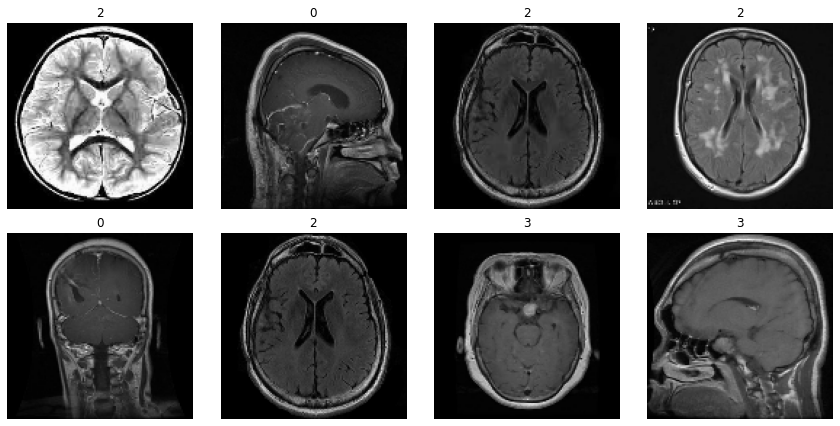

In [ ]:
plt.figure(figsize=(12, 6))

for images, labels in train_ds.take(1):
     for i in range(8):
         ax = plt.subplot(2, 4, i + 1)
         plt.imshow(images[i].numpy().astype("uint8"))
         plt.title(int(labels[i]))
         plt.axis("off")
plt.tight_layout()

## Checking for class imbalance:

In [ ]:
y = np.concatenate([y for x, y in train_ds], axis=0)

In [ ]:
unique, counts = np.unique(y, return_counts=True)
dict(zip(unique, counts))

{0: 1077, 1: 1090, 2: 1247, 3: 1156}

## Classes are not significantly imbalanced:

In [ ]:
import tensorflow
from tensorflow.keras import layers, models
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten
from keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

In [ ]:
# Build a simple CNN from scratch

model = Sequential()
#add model layers

model.add(Conv2D(16, kernel_size=3, activation="relu", input_shape=(128,128,3)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32, kernel_size=3, activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(layers.Dense(32, activation='relu', kernel_regularizer = tf.keras.regularizers.L2(l2=0.001)))

model.add(layers.Dropout(0.3))
model.add(Dense(4, activation="softmax"))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 28800)             0         
                                                                 
 dense (Dense)               (None, 64)                1

In [ ]:
# Define the EarlyStopping callback
early_stop = EarlyStopping(monitor='val_loss', patience=5)

In [ ]:
# Compile the model with the adam optimizer.
adam_optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)

# Use tf.keras.losses.SparseCategoricalCrossentropy() as the loss
# sparse_categorical_accuracy as the metric - Calculates how often predictions match integer labels.
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(), 
    optimizer=adam_optimizer, 
    metrics=tf.keras.metrics.sparse_categorical_accuracy
)


# Fit it to the training data (use the training and validation generators defined above)
# Run it for 30 epochs

history = model.fit(train_ds, batch_size=1024, epochs=30, validation_data=val_ds, callbacks=[early_stop])
history

Epoch 1/30
143/143 [==============================] - 6s 41ms/step - loss: 7.7939 - sparse_categorical_accuracy: 0.6079 - val_loss: 0.6255 - val_sparse_categorical_accuracy: 0.7916
Epoch 2/30
143/143 [==============================] - 6s 41ms/step - loss: 0.6618 - sparse_categorical_accuracy: 0.7602 - val_loss: 0.5006 - val_sparse_categorical_accuracy: 0.8555
Epoch 3/30
143/143 [==============================] - 7s 48ms/step - loss: 0.4928 - sparse_categorical_accuracy: 0.8341 - val_loss: 0.4883 - val_sparse_categorical_accuracy: 0.8713
Epoch 4/30
143/143 [==============================] - 6s 43ms/step - loss: 0.4375 - sparse_categorical_accuracy: 0.8667 - val_loss: 0.4370 - val_sparse_categorical_accuracy: 0.8870
Epoch 5/30
143/143 [==============================] - 7s 45ms/step - loss: 0.4116 - sparse_categorical_accuracy: 0.8821 - val_loss: 0.4914 - val_sparse_categorical_accuracy: 0.8870
Epoch 6/30
143/143 [==============================] - 6s 40ms/step - loss: 0.3566 - sparse_cate

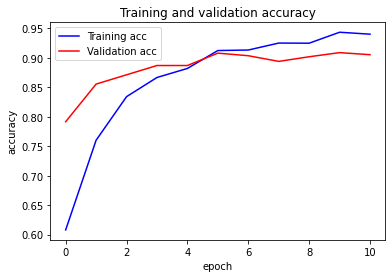

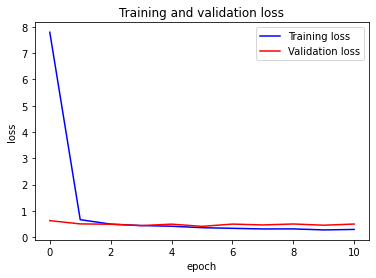

In [ ]:
#Graphing our training and validation
acc = history.history["sparse_categorical_accuracy"]
val_acc = history.history["val_sparse_categorical_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(len(acc))
plt.plot(epochs, acc, "b", label="Training acc")
plt.plot(epochs, val_acc, "r", label="Validation acc")
plt.title("Training and validation accuracy")
plt.ylabel("accuracy") 
plt.xlabel("epoch")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "b", label="Training loss")
plt.plot(epochs, val_loss, "r", label="Validation loss")
plt.title("Training and validation loss")
plt.ylabel("loss") 
plt.xlabel("epoch")
plt.legend()
plt.show()

In [ ]:
y_true, y_pred = eval_model_on_test(model)

Found 1311 files belonging to 4 classes.


Predicting on Test Data: 100%|██████████| 11/11 [00:02<00:00,  4.32it/s]


In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
predicted_classes = y_pred.argmax(axis=1)
predicted_classes

array([2, 1, 1, ..., 1, 1, 3])

In [ ]:
cm = confusion_matrix(y_true, predicted_classes)

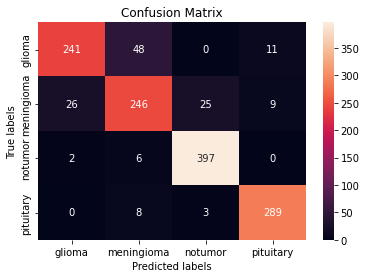

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);

ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(class_names); ax.yaxis.set_ticklabels(class_names);

In [ ]:
class_names=['glioma', 'meningioma', 'notumor', 'pituitary']

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_true, predicted_classes, target_names=class_names))

              precision    recall  f1-score   support

      glioma       0.90      0.80      0.85       300
  meningioma       0.80      0.80      0.80       306
     notumor       0.93      0.98      0.96       405
   pituitary       0.94      0.96      0.95       300

    accuracy                           0.89      1311
   macro avg       0.89      0.89      0.89      1311
weighted avg       0.89      0.89      0.89      1311



In [ ]:
model.save("/content/drive/MyDrive/SIT_ML/tumor_model_dense_64_dropout_03_L2")

INFO:tensorflow:Assets written to: /content/drive/MyDrive/SIT_ML/tumor_model_dense_64_dropout_03_L2/assets


## If you want to apply data augmentation operations on the train dataset

Go to the `prepare_train_and_val_datasets(...)` and you can add augmentation operations directly to the train dataset as follows:

```
train_ds = (train_ds.map(lambda image, label: (tf.image.random_flip_left_right(image), label))
                    .map(lambda image, label: (tf.image.random_contrast(image, lower=0.2, upper=1.5), label))
                        .shuffle(2000)
                        .prefetch(buffer_size=tf.data.AUTOTUNE))
```


Remember to check [`tf.image`](https://www.tensorflow.org/api_docs/python/tf/image#image_adjustments) for various image transforms available and you can play around with augmentations

__Be careful here and don't add too many transforms which can distort the images beyond recognition__

In [ ]:
IMG_DIMS = (224, 224)
BATCH_SIZE = 32
IMG_SHAPE = IMG_DIMS + (3,)
classes = ['glioma', 'meningioma', 'notumor', 'pituitary']

def prepare_train_and_val_datasets():
    train_ds = tf.keras.preprocessing.image_dataset_from_directory(
        "/content/Training",
        validation_split=0.2,
        subset="training",
        class_names=['glioma', 'meningioma', 'notumor', 'pituitary'],
        seed=42,
        image_size=IMG_DIMS,
        batch_size=BATCH_SIZE,
    )
    train_ds = (train_ds.map(lambda image, label: (tf.image.random_flip_left_right(image), label))
                    .map(lambda image, label: (tf.image.random_contrast(image, lower=0.2, upper=1.5), label))
                        .shuffle(2000)
                        .prefetch(buffer_size=tf.data.AUTOTUNE))

    val_ds = tf.keras.preprocessing.image_dataset_from_directory(
        "/content/Training",
        validation_split=0.2,
        subset="validation",
        class_names=['glioma', 'meningioma', 'notumor', 'pituitary'],
        seed=42,
        image_size=IMG_DIMS,
        batch_size=BATCH_SIZE,
    )

    train_ds = train_ds.prefetch(buffer_size=25)
    val_ds = val_ds.prefetch(buffer_size=25)

    return train_ds, val_ds

In [ ]:
train_ds, val_ds = prepare_train_and_val_datasets()

Found 5712 files belonging to 4 classes.
Using 4570 files for training.
Found 5712 files belonging to 4 classes.
Using 1142 files for validation.


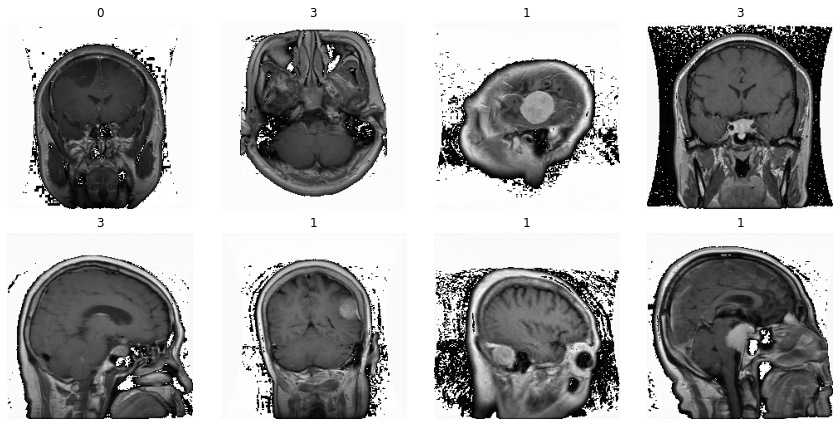

In [ ]:
plt.figure(figsize=(12, 6))

for images, labels in train_ds.take(1):
     for i in range(8):
         ax = plt.subplot(2, 4, i + 1)
         plt.imshow(images[i].numpy().astype("uint8"))
         plt.title(int(labels[i]))
         plt.axis("off")
plt.tight_layout()

In [ ]:
model_name = 'resnet50_v01'

# load a new instance of the model.
model_res = tf.keras.applications.resnet50.ResNet50(input_shape=(224,224,3),
                                              include_top=True,
                                              weights='imagenet',
                                                    )

In [ ]:
model_res.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_7 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_7[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

In [ ]:
for layer in model_res.layers[-5:]:
  print(layer.name)

conv5_block3_3_bn
conv5_block3_add
conv5_block3_out
avg_pool
predictions


In [ ]:
last_conv_layer = model_res.get_layer('conv5_block3_out')
last_conv_layer

In [ ]:
from tensorflow.keras.models import Model, Sequential

In [ ]:
conv_model = Model(inputs=model_res.input,
                   outputs=last_conv_layer.output)

In [ ]:
# Transfer the layers in conv_model from ResNet to new_model
conv_model.trainable = False

In [ ]:
print(model_res.layers[0].output_shape[0]) 
input_shape = model_res.layers[0].output_shape[0][1:3] 
input_shape

(None, 224, 224, 3)


(224, 224)

In [ ]:
new_model = Sequential()
# Batch normalization
# remove regularization
new_model.add(conv_model)
new_model.add(MaxPooling2D(pool_size=(2,2)))
new_model.add(Flatten())

new_model.add(tf.keras.layers.Dense(64, activation='relu', kernel_regularizer = tf.keras.regularizers.L2(l2=0.001)))
# dropout 0.2
new_model.add(tf.keras.layers.Dropout(0.2))
new_model.add(tf.keras.layers.Dense(32, activation='relu', kernel_regularizer = tf.keras.regularizers.L2(l2=0.001)))
new_model.add(tf.keras.layers.Dropout(0.2))
new_model.add(Dense(4, activation="softmax"))

In [ ]:
early_stop = EarlyStopping(monitor='val_loss', patience=10)

In [ ]:
adam_optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)

In [ ]:
new_model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(), 
    optimizer=adam_optimizer, 
    metrics=tf.keras.metrics.sparse_categorical_accuracy
)

In [ ]:
history = new_model.fit(
    train_ds,
    epochs=30,
    batch_size=1024,
    validation_data=val_ds,
    callbacks = [early_stop]
    ) 

Epoch 1/30
143/143 [==============================] - 25s 80ms/step - loss: 1.7685 - sparse_categorical_accuracy: 0.6217 - val_loss: 0.7666 - val_sparse_categorical_accuracy: 0.7820
Epoch 2/30
143/143 [==============================] - 20s 75ms/step - loss: 0.8535 - sparse_categorical_accuracy: 0.7626 - val_loss: 0.6060 - val_sparse_categorical_accuracy: 0.8704
Epoch 3/30
143/143 [==============================] - 20s 75ms/step - loss: 0.6984 - sparse_categorical_accuracy: 0.8125 - val_loss: 0.4951 - val_sparse_categorical_accuracy: 0.8669
Epoch 4/30
143/143 [==============================] - 20s 75ms/step - loss: 0.5683 - sparse_categorical_accuracy: 0.8409 - val_loss: 0.4012 - val_sparse_categorical_accuracy: 0.9107
Epoch 5/30
143/143 [==============================] - 20s 75ms/step - loss: 0.5247 - sparse_categorical_accuracy: 0.8665 - val_loss: 0.3480 - val_sparse_categorical_accuracy: 0.9299
Epoch 6/30
143/143 [==============================] - 21s 74ms/step - loss: 0.4557 - spars

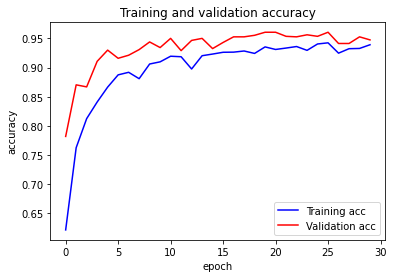

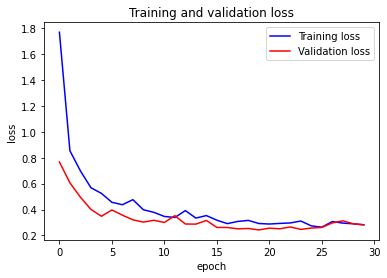

In [ ]:
#Graphing our training and validation
acc = history.history["sparse_categorical_accuracy"]
val_acc = history.history["val_sparse_categorical_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(len(acc))
plt.plot(epochs, acc, "b", label="Training acc")
plt.plot(epochs, val_acc, "r", label="Validation acc")
plt.title("Training and validation accuracy")
plt.ylabel("accuracy") 
plt.xlabel("epoch")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "b", label="Training loss")
plt.plot(epochs, val_loss, "r", label="Validation loss")
plt.title("Training and validation loss")
plt.ylabel("loss") 
plt.xlabel("epoch")
plt.legend()
plt.show()

In [ ]:
new_model.save("/content/drive/MyDrive/SIT_ML/resnet_tumor_dropout2")

INFO:tensorflow:Assets written to: /content/drive/MyDrive/SIT_ML/resnet_tumor_dropout2/assets


In [ ]:
y_true, y_pred = eval_model_on_test(new_model)

Found 1311 files belonging to 4 classes.


Predicting on Test Data: 100%|██████████| 11/11 [00:10<00:00,  1.07it/s]


In [ ]:
predicted_classes = y_pred.argmax(axis=1)
predicted_classes

array([2, 1, 1, ..., 1, 1, 3])

In [ ]:
cm = confusion_matrix(y_true, predicted_classes)

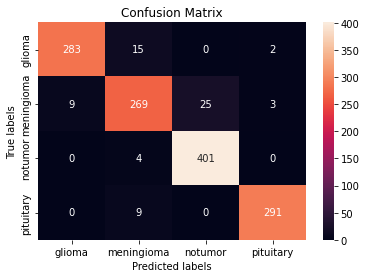

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);

ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(class_names); ax.yaxis.set_ticklabels(class_names);

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_true, predicted_classes, target_names=class_names))

              precision    recall  f1-score   support

      glioma       0.97      0.94      0.96       300
  meningioma       0.91      0.88      0.89       306
     notumor       0.94      0.99      0.97       405
   pituitary       0.98      0.97      0.98       300

    accuracy                           0.95      1311
   macro avg       0.95      0.95      0.95      1311
weighted avg       0.95      0.95      0.95      1311

